# AI 12강 : 계층군집, 밀집도 기반 군집
Unsupervised Learning, Clustering Analysis

## 계층 군집 Hierachical clustering

### 특징
1. 덴드로그램 dendrogram 을 그릴 수 있다.
    - 덴드로그램은 의미있는 분류 체계를 그린다.
    - 군집 결과를 이해하거나 설명하기 쉽다.
2. 클러스터의 수를 미리 지정하지 않아도 된다.

### 분류

1. 분할 계층 군집 Divisive hierachical clustering  
    전체 데이터를 포함하는 하나의 클러스터에서 시작해 클러스터 속 데이터가 하나가 될 때 까지 분류를 반복한다.

2. 병합 계층 군집 agglomerative hierachical clustering  
    클러스터 당 하나의 데이터에서 시작하여 모든 데이터가 하나의 클러스터에 속할 때 까지 가장 가까운 클러스터를 병합한다.
    - 기본 알고리즘
        1. 단일 연결  
            1. 클러스터 쌍에서 가장 비슷한 (가까운) 데이터 간의 거리를 계산한다.
            2. 거리의 값이 가장 작은 두 클러스터를 하나로 합친다.
        2. 완전 연결  
            1. 클러스터 쌍에서 가장 다른 데이터 (멀리에 있는) 데이터 간의 거리를 계산한다.
            2. 가장 가까운 두 클러스터를 합친다.
        3. 평균 연결  
            - 두 클러스터에 있는 모든 샘플사이의 거리가 가장 작은 클러스터를 합친다.
        4. 와드 연결  
            - 클러스터 내의 SSE가 가장 작게 증가하는 클러스터를 합친다.
            - SSE : 두 군집이 합쳐졌을 때의 제곱 오차합

    

### 병합 계층 군집 / 완전연결 순서

1. 모든 데이터의 거리행렬 계산
2. 모든 데이터 포인트를 단일 클러스터로 표현
3. 가장 멀리 떨어진 데이터 간 거리를 기준으로 가장 가까운 두 클러스터를 병합
4. 유사도 행렬 업데이트
5. 하나의 클러스터가 남을 때 까지 2~4단계 반복

**1. 모든 데이터의 거리행렬 계산**


In [8]:
# 데이터 생성
import numpy as np 
np.random.seed(123)
X = np.random.random_sample([5,3])*10  # 5행 3열 행렬에 0~1 까지의 임의의 실수 데이터 생성 후 자리수 변경 (*10)

# 데이터프레임 생성
import pandas as pd 
variables = ['X', 'Y', 'Z']
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']
df = pd.DataFrame(X, columns = variables, index = labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


In [9]:
# 거리행렬 계산
from scipy.spatial.distance import pdist, squareform

Y = pdist(df)  # pdist() : X, Y, Z 값에 대한 축약된 거리 행렬
print(Y)

# 거리행렬 데이터프레임 생성
# squareform() : 거리행렬 벡터를 행렬형식으로 변환
row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')), 
            columns = labels, index=labels)
row_dist

[4.973534   5.51665266 5.89988504 3.83539555 4.34707339 5.10431109
 6.69823298 7.24426159 8.31659367 4.382864  ]


,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


### 2 ~ 5. 계층 군집 시행

In [10]:
# 완전연결 병합방식 적용 : linkage (반환값을 그대로 사용해서는 안된다.)
from scipy.cluster.hierarchy import linkage

help(linkage)

Help on function linkage in module scipy.cluster.hierarchy:

linkage(y, method='single', metric='euclidean', optimal_ordering=False)
    Perform hierarchical/agglomerative clustering.
    
    The input y may be either a 1-D condensed distance matrix
    or a 2-D array of observation vectors.
    
    If y is a 1-D condensed distance matrix,
    then y must be a :math:`\binom{n}{2}` sized
    vector, where n is the number of original observations paired
    in the distance matrix. The behavior of this function is very
    similar to the MATLAB linkage function.
    
    A :math:`(n-1)` by 4 matrix ``Z`` is returned. At the
    :math:`i`-th iteration, clusters with indices ``Z[i, 0]`` and
    ``Z[i, 1]`` are combined to form cluster :math:`n + i`. A
    cluster with an index less than :math:`n` corresponds to one of
    the :math:`n` original observations. The distance between
    clusters ``Z[i, 0]`` and ``Z[i, 1]`` is given by ``Z[i, 2]``. The
    fourth value ``Z[i, 3]`` represents t

`pdist` 함수에서 축약한 거리행렬을 입력하지만 그대로 입력하면 안된다.  
linkage함수의 초기 데이터 배열을 전달하고, euclidean 지표를 매개변수로 사용하자  

축약된 거리행렬을 이용하여 올바른 거리행렬을 얻거나 원본 샘플을 얻거나 올바른 원본 샘플을 얻어야 한다.

In [11]:
# pdist를 통과한 데이터 프레임을 바로 넣지 말 것
# row_clusters = linkage(row_dist, method="complete", metric="euclidean")   # X

row_clusters = linkage(pdist(df, metric="euclidean"), method="complete")

row_clusters

array([[0.        , 4.        , 3.83539555, 2.        ],
       [1.        , 2.        , 4.34707339, 2.        ],
       [3.        , 5.        , 5.89988504, 3.        ],
       [6.        , 7.        , 8.31659367, 5.        ]])

In [12]:
# 군집결과 변환

pd.DataFrame(row_clusters,
columns = ['row label 1', 'row label 2', 'distance', 'no. of items in clust.'],
index = ['cluster %d' %(i+1) for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


**해석**

- 덴드로그램 사용한다.

1. 군집의 개수는 4개 (cluster 1 ~ 4)
2. row label 1과 row label 2는 각 클러스터에서 완전 연결방식으로 병합된 클러스터.
    - ex) cluster 1은 ID가 0인 데이터와 4.0인 데이터가 병합된 클러스터다.
    - 이 때 ID 5.0은 ID가 0.0인 데이터와 4.0인 데이터가 병합된 클러스터를 말한다.
3. distance : 클러스터간 거리
4. no. of items in clust. : 군집에 포함된 데이터의 개수


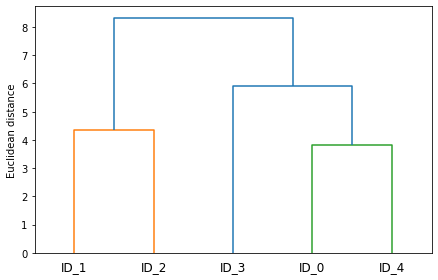

In [14]:
import matplotlib.pyplot as plt 
# from scipy.cluster.hierarchy import dendrogram

row_dendr = dendrogram(row_clusters, labels = labels)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

### 계층군집 덴드로그램과 히트맵 heat map

일정한 이미지 위 또는 측면에 열분포 형태로 데이터를 시각화하는 기법  
데이터 행렬의 개별값을 색으로 표현할 수 있다. 

## 밀집도 기반 군집 DBSCAN

### 특징
- 원형 클러스터를 가정하지 않는다. (k-mean처럼)
- 데이터가 조밀하게 모인 지역에 클러스터 레이블을 할당한다

### 밀집도?
특정 반경 안에 있는 샘플의 개수로 정의
- 특정 반경 : $\epsilon$ 엡실론 epsilon 
- 샘플의 개수 : MinPts
- 샘플의 레이블 :
    - 중심점 core point : 특정 반경 $\epsilon$ 안에 있는 이웃점이 지정한 개수 이상일 때
    - 경계점 border point : 이웃점의 개수가 지정한 개수 이내이나 다른 반경에 포함될 때
        - 교집합이 있는 군집은 '연결되었다'고 하고 하나의 군집으로 취급한다.
        - 주로 클러스터의 외곽을 이룬다.
    - 이상치 noise point : 어느 반경에도 속하지 않는 모든 점들

### 장점
1. 클러스터의 모양을 원형으로 가정하지 않는다.
2. 모든 데이터를 클러스터에 할당하지 않아도 되므로 이상치를 걸러낼 수 있다.

In [21]:
from sklearn.datasets import make_moons  # 반달모양을 그리는 데이터셋

X, y = make_moons(n_samples=200, noise=0.05, random_state = 0)

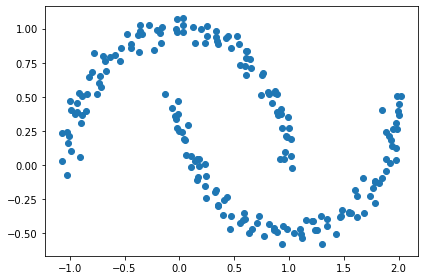

In [19]:
plt.scatter(X[:,0], X[:,1])
plt.tight_layout()
plt.show()

### 문제
데이터의 특성이 늘어남에 따라 차원의 저주로 인한 역효과 발생
- 차원의 저주는 이 알고리즘 뿐 아니라 다른 유클리디안 거리를 사용하는 알고리즘에서도 발생하는 문제다.
- 해결 : 차원축소, 표준화

### 좋은 군집결과를 만드는 방법
- `epsilon` 과 `min_smaples` 의 값을 적절하게 설정하는 **하이퍼파라미터 최적화** 작업을 해야한다.

> 하나의 알고리즘에 의존하지 말 것  
> 실험 환경을 구성하는데 도움을 줄 수 있는 **도메인 지식**을 갖춰야 한다.